In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  
from __future__ import absolute_import

In [2]:
from extract_data import *
from finbeat_calc import *
from plot_track import *
from plot_accel import *
from check_plots import *
from plot_analysis import *
from make_subset import *
from read_data import *
from fourier_analysis import *
import pywt
import pylab
import numpy as np

plt.style.use('mystyle.mplstyle')

tracklist, finbeats, finbeat_byP, finbeat_byT = read_data('data.pickle')

In [7]:
bass_subset = make_subset(group_by1='species', identifier1='Bass', tracklist=tracklist)
bass_burst_subset = make_subset(group_by1 = 'species', identifier1='Bass', 
                                 tracklist=tracklist, group_by2 = 'behavior', identifier2='B')
bass_steady_subset = make_subset(group_by1 = 'species', identifier1='Bass', 
                                 tracklist=tracklist, group_by2 = 'behavior', identifier2='S')
bass_linacc_subset = make_subset(group_by1 = 'species', identifier1='Bass', 
                                 tracklist=tracklist, group_by2 = 'behavior', identifier2='A')
trout_subset = make_subset(group_by1 = 'species', identifier1 ='BTrout', tracklist=tracklist)
trout_burst_subset = make_subset(group_by1 = 'species', identifier1='BTrout', 
                                 tracklist=tracklist, group_by2 = 'behavior', identifier2='B')
trout_steady_subset = make_subset(group_by1 = 'species', identifier1='BTrout', 
                                 tracklist=tracklist, group_by2 = 'behavior', identifier2='S')
trout_linacc_subset = make_subset(group_by1 = 'species', identifier1='BTrout', 
                                 tracklist=tracklist, group_by2 = 'behavior', identifier2='A')

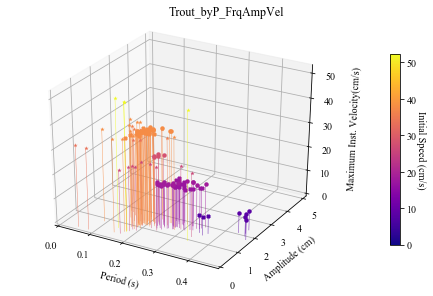

130


In [4]:
plot_analysis("Trout_byP_FrqAmpVel",trout_subset,finbeat_byP,tracklist,cutoff=False, lines=True, zaxis = 'V', save=False)

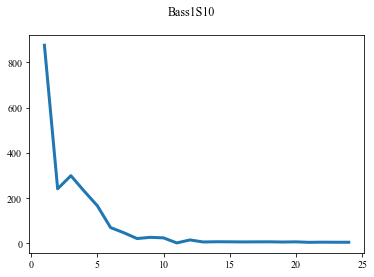

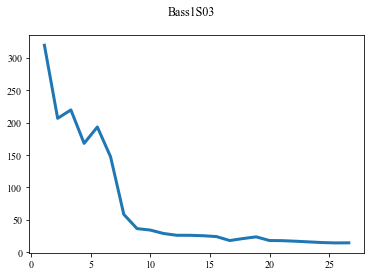

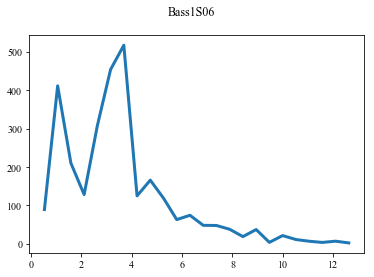

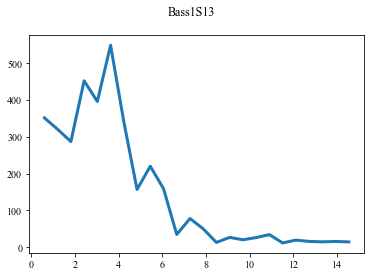

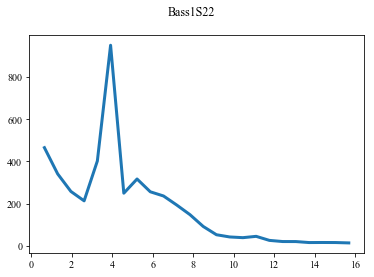

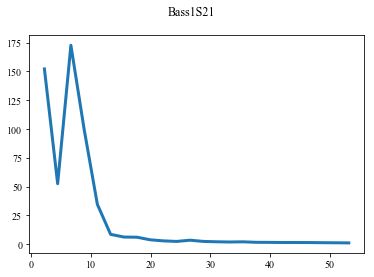

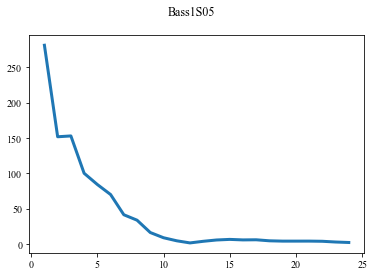

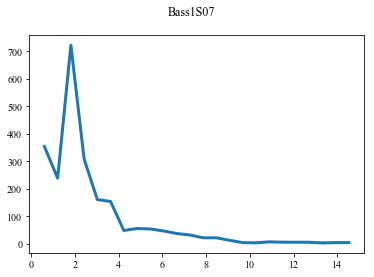

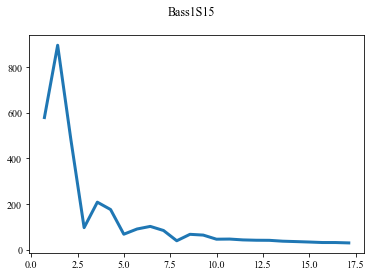

In [13]:
fourier_analysis(bass_burst_subset, tracklist)

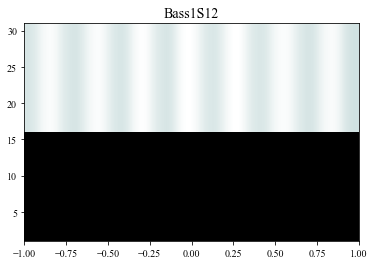

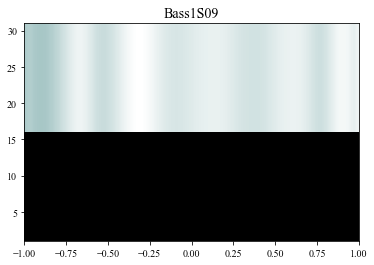

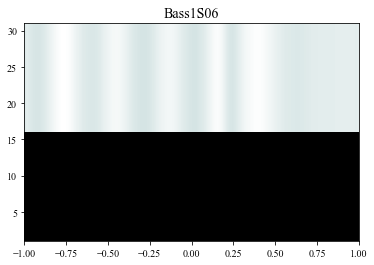

In [6]:
tracklist_subset = ['Bass1S12', 'Bass1S09', 'Bass1S06']


for trial in tracklist_subset:
    data = tracklist[trial]['data']['pt2y_smth']
    length = data.size
    FR = tracklist[trial]['FPS']
    sampling = 1.0/FR
    x = pylab.arange(0, 1, 1. / length)

    cA = []
    cD = []

    (cA, cD) = pywt.dwt(data,'sym20')

    pylab.title(trial)
    pylab.imshow((cA,cD), extent=[-1, 1, 1, 31], cmap='bone', aspect='auto') 
    pylab.show()


